<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/GraceDataMLTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seperating data into test and train

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData = GraceData[GraceData['Diabetes'] != '#NULL!'] # Removed bad data with no diabetes

GraceData['Country'] = pd.factorize(GraceData['Country'])[0] + 1 # Convert 'Country' column to numerical



X = GraceData.drop(columns=["Diabetes","seriali"])
y = GraceData["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape
X_test.shape

(1553, 51)

# Finding the most accurate amount of neightbours with Nearest Neighbour.

In [ ]:
score = 0
TopKNeighborsClassifierAmount = ""

for KNeighborsClassifierAmount in range(1,30):


  knnc = KNeighborsClassifier(int(KNeighborsClassifierAmount),weights="distance")
  knnc.fit(X_train, y_train)



  if knnc.score(X_test, y_test) > score:
    score = knnc.score(X_test, y_test)
    TopKNeighborsClassifierAmount = KNeighborsClassifierAmount


  print(KNeighborsClassifierAmount)
  print(knnc.score(X_test, y_test))

print("Top Scores")
print(TopKNeighborsClassifierAmount)
print(score)

1
0.6522858982614295
2
0.6522858982614295
3
0.686413393432067
4
0.6928525434642627
5
0.708950418544752
6
0.7160334835801674
7
0.7198969735994849
8
0.7186091435930457
9
0.7134578235672892
10
0.7218287186091435
11
0.7147456535737282
12
0.7295556986477785
13
0.7141017385705087
14
0.7218287186091435
15
0.7134578235672892
16
0.7160334835801674
17
0.7179652285898261
18
0.7186091435930457
19
0.7141017385705087
20
0.7192530585962653
21
0.7108821635544108
22
0.7141017385705087
23
0.7115260785576304
24
0.7134578235672892


KeyboardInterrupt: 

# Finding the most accurate amount of neightbours with Decision Tree.

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler

score = 0
TopTreeDepth = ""

for TreeDepth in range(0,30):

  if TreeDepth == 0:
    TreeDepth = None


  # Normalize the data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)


  desisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=TreeDepth)
  desisionTreeClassifier = desisionTreeClassifier.fit(X_train, y_train)

  desisionTreeClassifier.fit(X_train, y_train)

  #tree.plot_tree(desisionTreeClassifier)
  print(TreeDepth)
  print(desisionTreeClassifier.score(X_test, y_test))

  if desisionTreeClassifier.score(X_test, y_test) > score:
    score = desisionTreeClassifier.score(X_test, y_test)
    TopTreeDepth = TreeDepth

print("Top Scores")
print(TopTreeDepth)
print(score)

desisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=TopTreeDepth)
desisionTreeClassifier = desisionTreeClassifier.fit(X_train, y_train)


PredictedResults = desisionTreeClassifier.predict(X_test)
ActualResults = y_test

confusion_matrix(ActualResults, PredictedResults)
ConfusionMatrixDisplay.from_estimator(desisionTreeClassifier, X_test, y_test,normalize="true")

None
0.8802318094011591
1
0.8789439793947199
2
0.9143593045717965
3
0.9143593045717965
4
0.9104958145524791
5
0.9124275595621378
6
0.9085640695428203
7
0.901481004507405
8
0.8898905344494527
9
0.8873148744365744
10
0.8873148744365744
11
0.8860270444301352
12
0.8866709594333548


KeyboardInterrupt: 

# Random Forest

1
0.9001931745009659



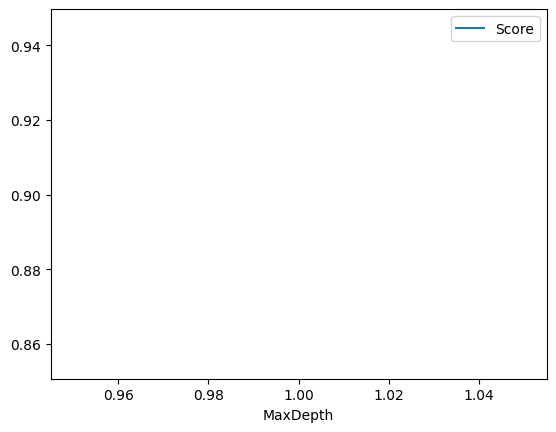

2
0.8989053444945267



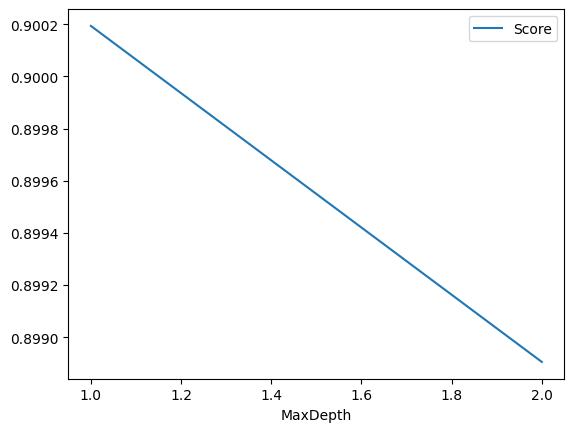

3
0.8995492594977463



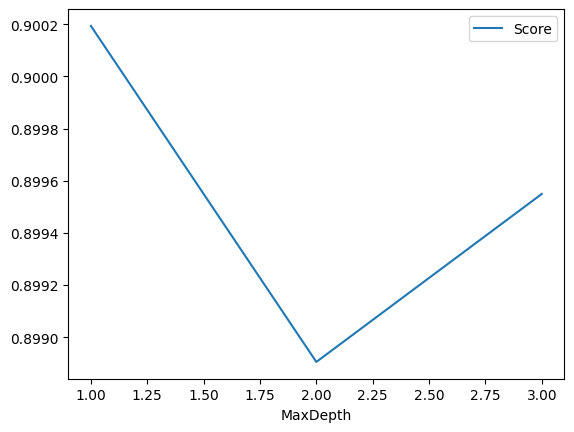

4
0.9001931745009659



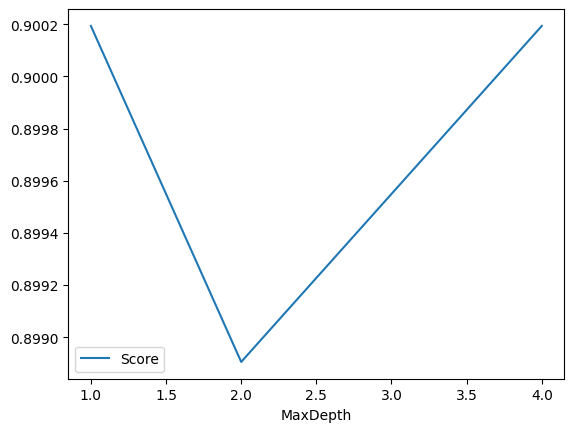

5
0.9021249195106246



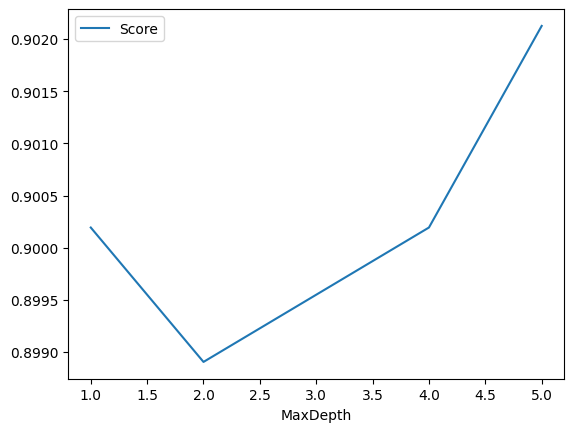

6
0.9027688345138442



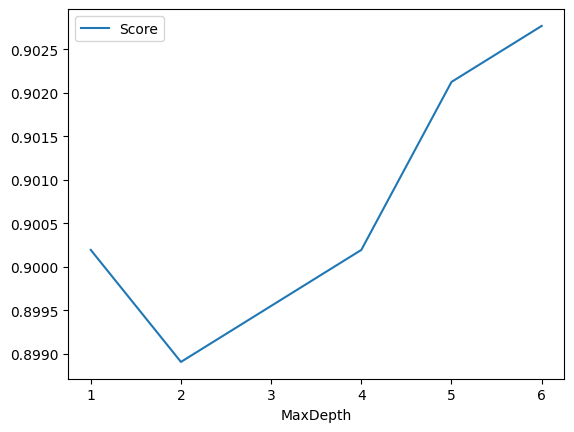

7
0.9059884095299421



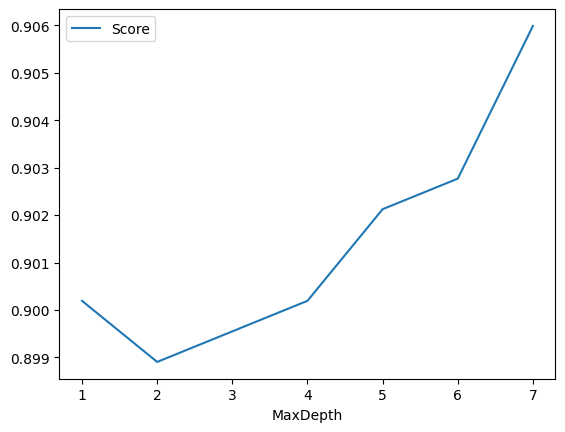

8
0.9072762395363811



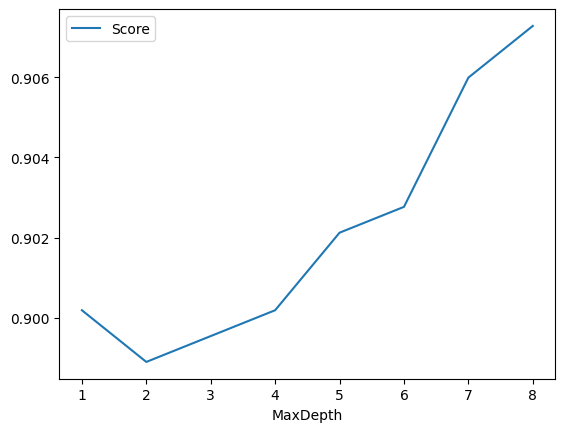

9
0.9079201545396007



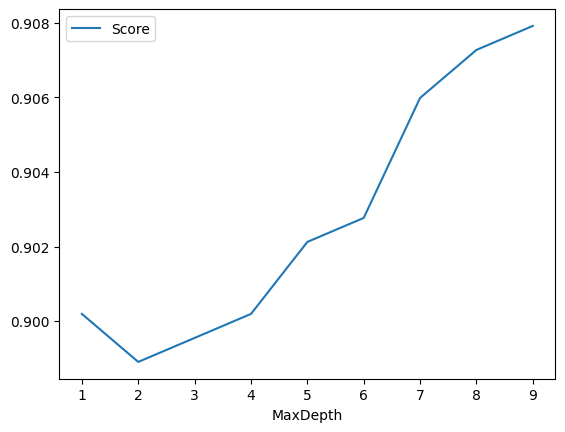

10
0.9079201545396007



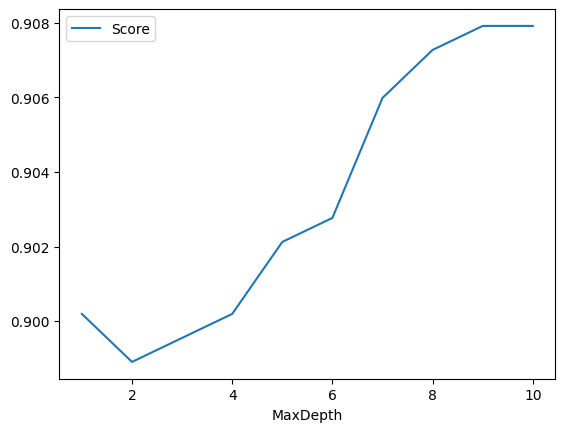

11
0.9079201545396007



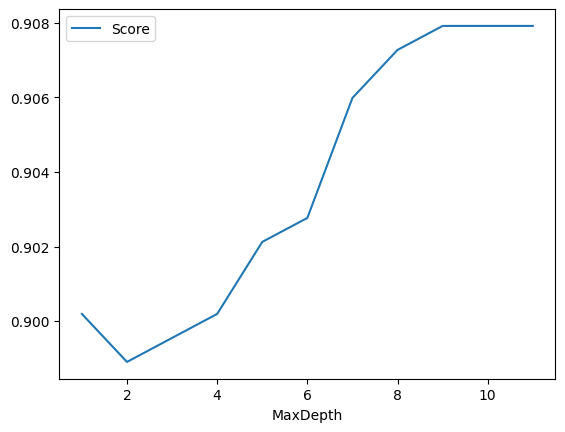

12
0.9098518995492595



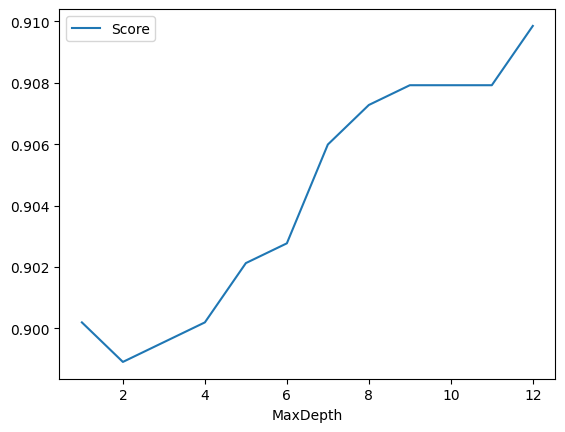

13
0.9092079845460399



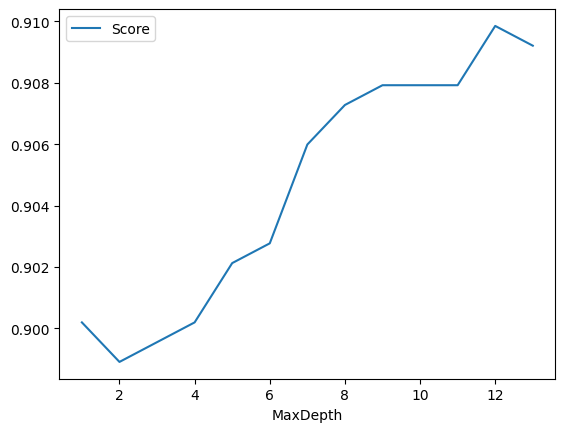

14
0.9066323245331617



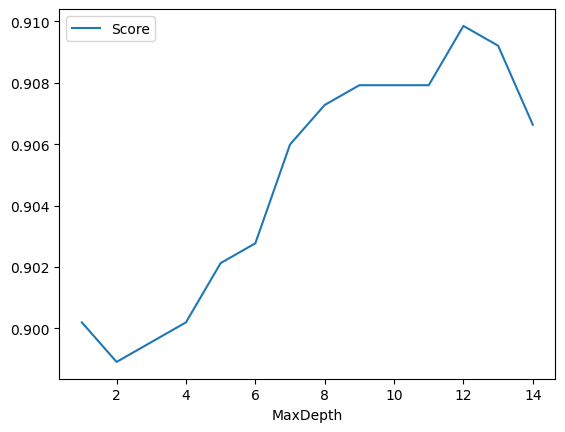

15
0.9085640695428203



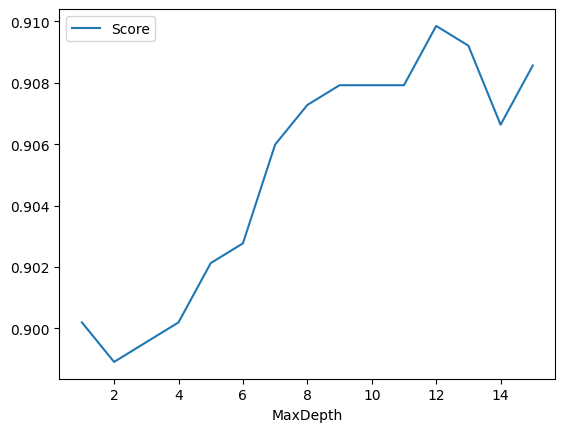

16
0.9092079845460399



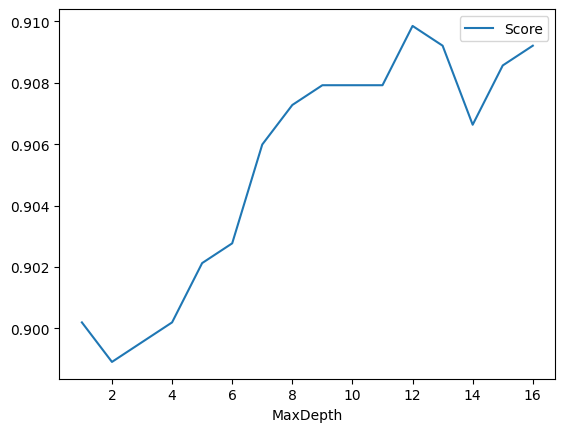

17
0.9085640695428203



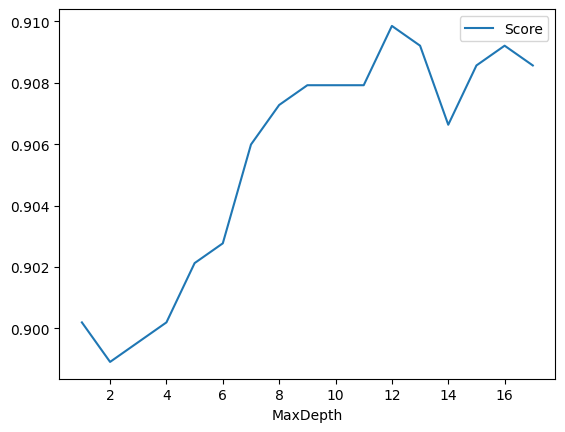

18
0.9079201545396007



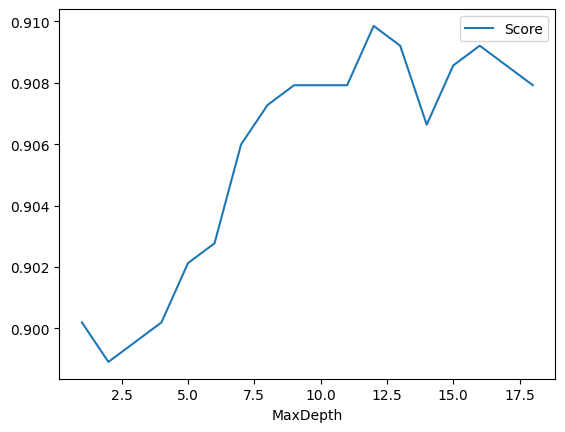

19
0.9092079845460399



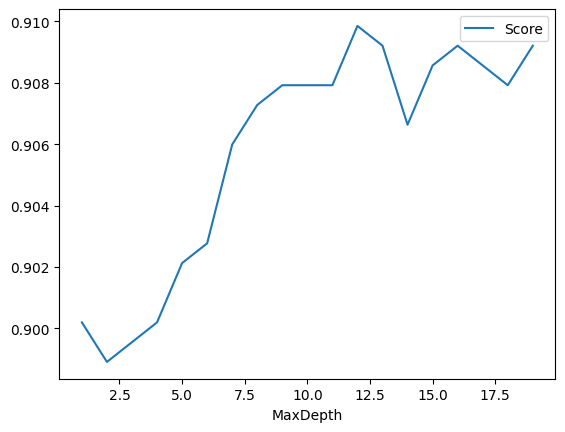

20
0.9098518995492595



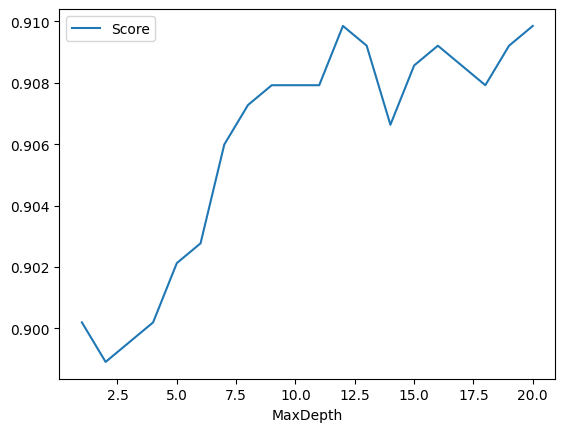

21
0.9085640695428203



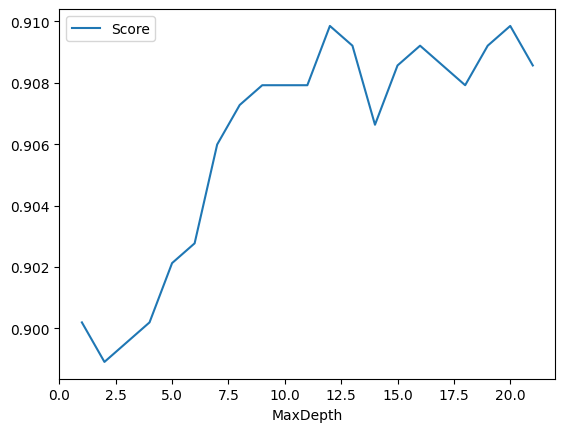

22
0.9092079845460399



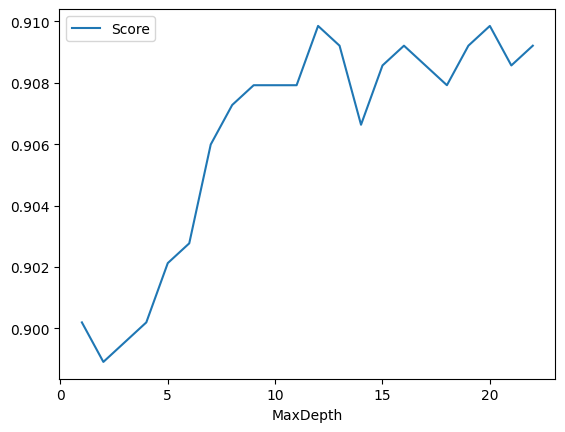

23
0.9072762395363811



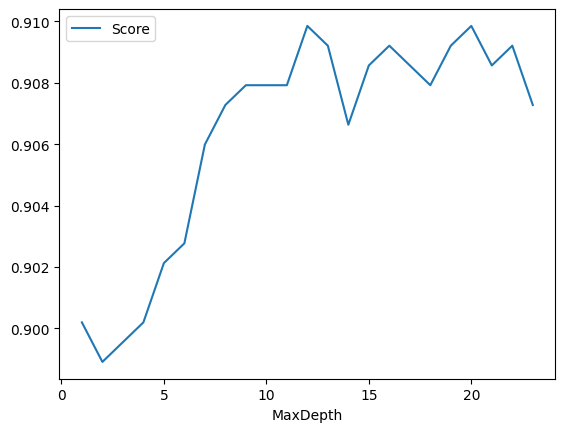

24
0.9098518995492595



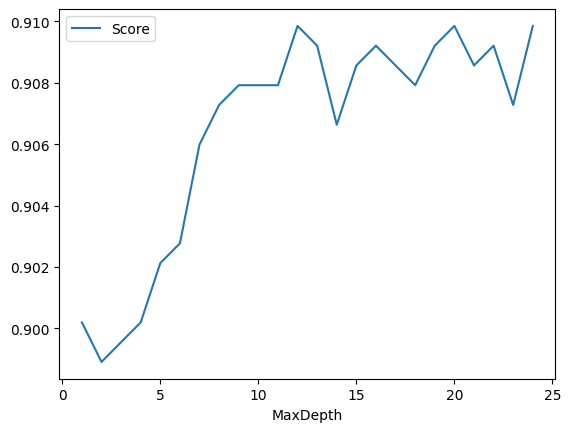

25
0.9098518995492595



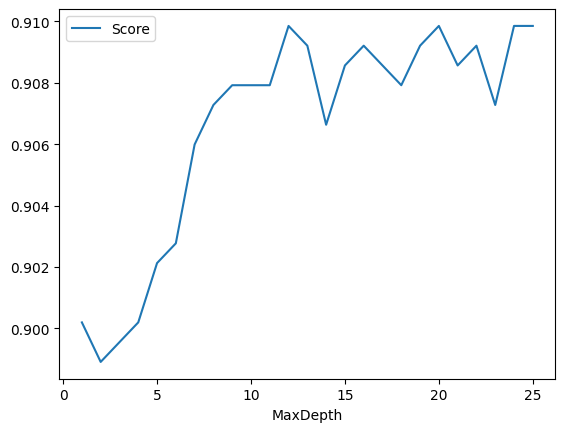

26
0.9098518995492595



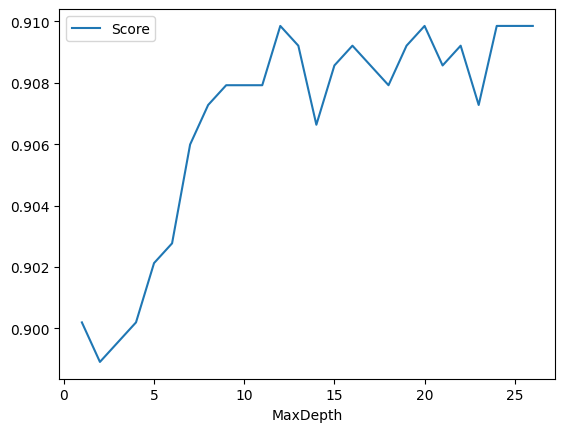

27
0.9092079845460399



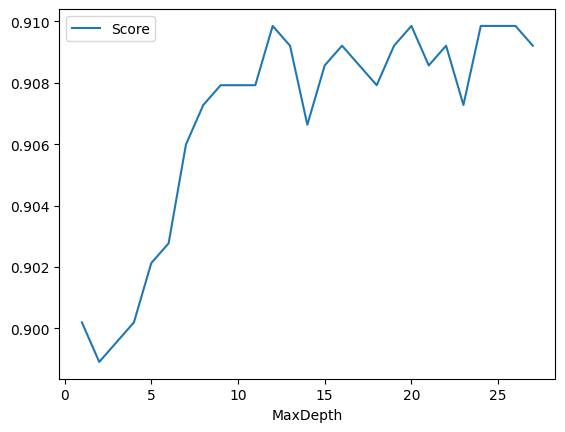

28
0.9098518995492595



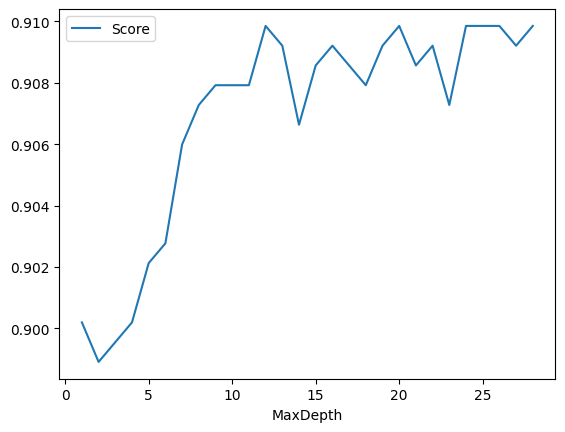

29
0.9098518995492595



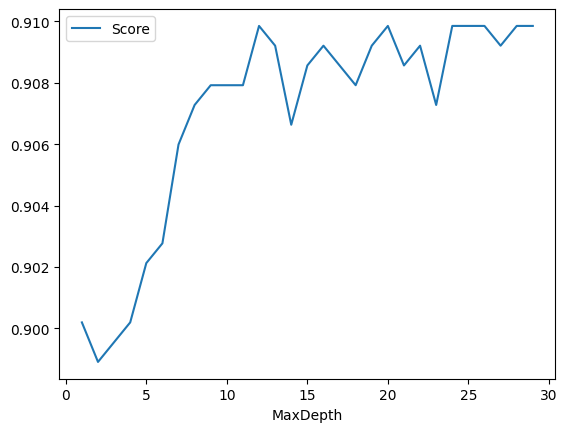

Top Scores
12
0.9098518995492595


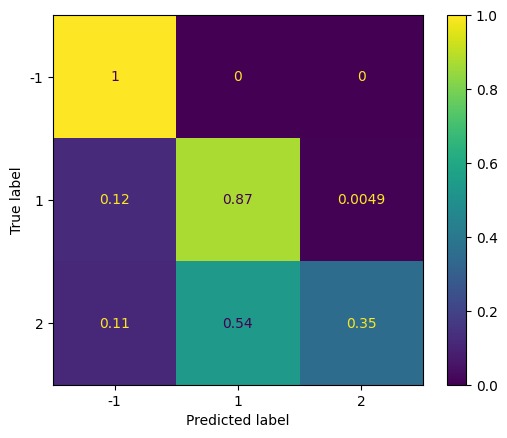

In [35]:
from pickle import TRUE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


#Confusion matrix imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

NumberOfEstimators = 500

score = 0
TopTreeDepth = ""

data = {"MaxDepth":[],"Score":[]}

rfResults = pd.DataFrame(data)

for maxDepth in range(1,30):


  RandomForestClassifierData = RandomForestClassifier(max_depth=maxDepth, random_state=0,n_estimators=NumberOfEstimators,bootstrap=True)
  RandomForestClassifierData.fit(X_train, y_train)

  if RandomForestClassifierData.score(X_test, y_test) > score:
    score = RandomForestClassifierData.score(X_test, y_test)
    TopmaxDepth = maxDepth


  print(maxDepth)
  print(RandomForestClassifierData.score(X_test, y_test))
  print("")

  rfResults.loc[len(rfResults)] = [maxDepth, RandomForestClassifierData.score(X_test, y_test)]

  rfResults.plot.line(x="MaxDepth",y="Score")
  plt.show()





print("Top Scores")
print(TopmaxDepth)
print(score)

RandomForestClassifierData = RandomForestClassifier(max_depth=TopmaxDepth, random_state=0,n_estimators=NumberOfEstimators)
RandomForestClassifierData.fit(X_train, y_train)

PredictedResults = RandomForestClassifierData.predict(X_test)
ActualResults = y_test

confusion_matrix(ActualResults, PredictedResults)
ConfusionMatrixDisplay.from_estimator(RandomForestClassifierData, X_test, y_test,normalize="true")

# Evaluating accuracy

1
1


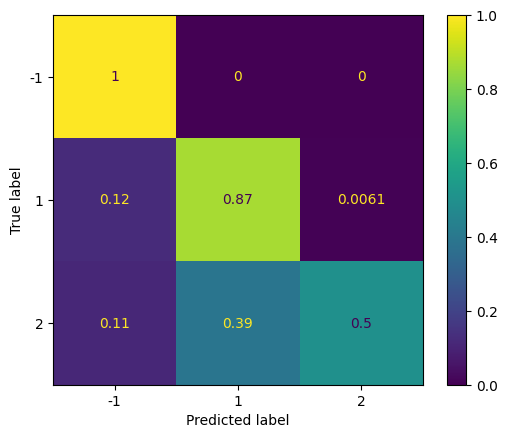

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#knnc = KNeighborsClassifier(int(12),weights="distance")
#knnc.fit(X_train, y_train)

PredictedResults = desisionTreeClassifier.predict(X_test)
ActualResults = y_test

confusion_matrix(ActualResults, PredictedResults)
#ConfusionMatrixDisplay.from_estimator(knnc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(desisionTreeClassifier, X_test, y_test,normalize="true")